**Part I: Dealing with missing data**

In [147]:
import pandas as pd

# Import data
df_e = pd.read_csv("employees.csv")

# Print the number of rows
print("Number of rows: ", len(df_e))

# Remove rows containing NaN values
df_e = df_e.dropna()

# Reset index
df_e = df_e.reset_index(drop=True)

# Print the number of rows after deletion
print("Aftering deleting the rows with NaN values: ", len(df_e))

Number of rows:  50
Aftering deleting the rows with NaN values:  41


**Part II: Mapping ordinal features**

In [148]:
# Import data
df_d = pd.read_csv("diabetes.csv")

# Map "NO" to 0 and "Yes" to 1 in the "Outcome" column
df_d["Outcome"] = df_d["Outcome"].map({"NO": 0, "Yes":1})

# Print the modified dataframe
print(df_d)

                  Name  Pregnancies  Glucose  BloodPressure  SkinThickness  \
0        Laura Bennett            6      148             72             35   
1         Wesley Green            1       85             66             29   
2     Tina Johnson DDS            8      183             64              0   
3          Troy Fisher            1       89             66             23   
4         Nathan Brown            0      137             40             35   
..                 ...          ...      ...            ...            ...   
763     Tonya Hamilton           10      101             76             48   
764       Holly Guerra            2      122             70             27   
765      Melissa Lopez            5      121             72             23   
766        Wanda Baker            1      126             60              0   
767  Michelle Mcdonald            1       93             70             31   

     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome  
0 

**Part III: Identifying and Removing Outliers**

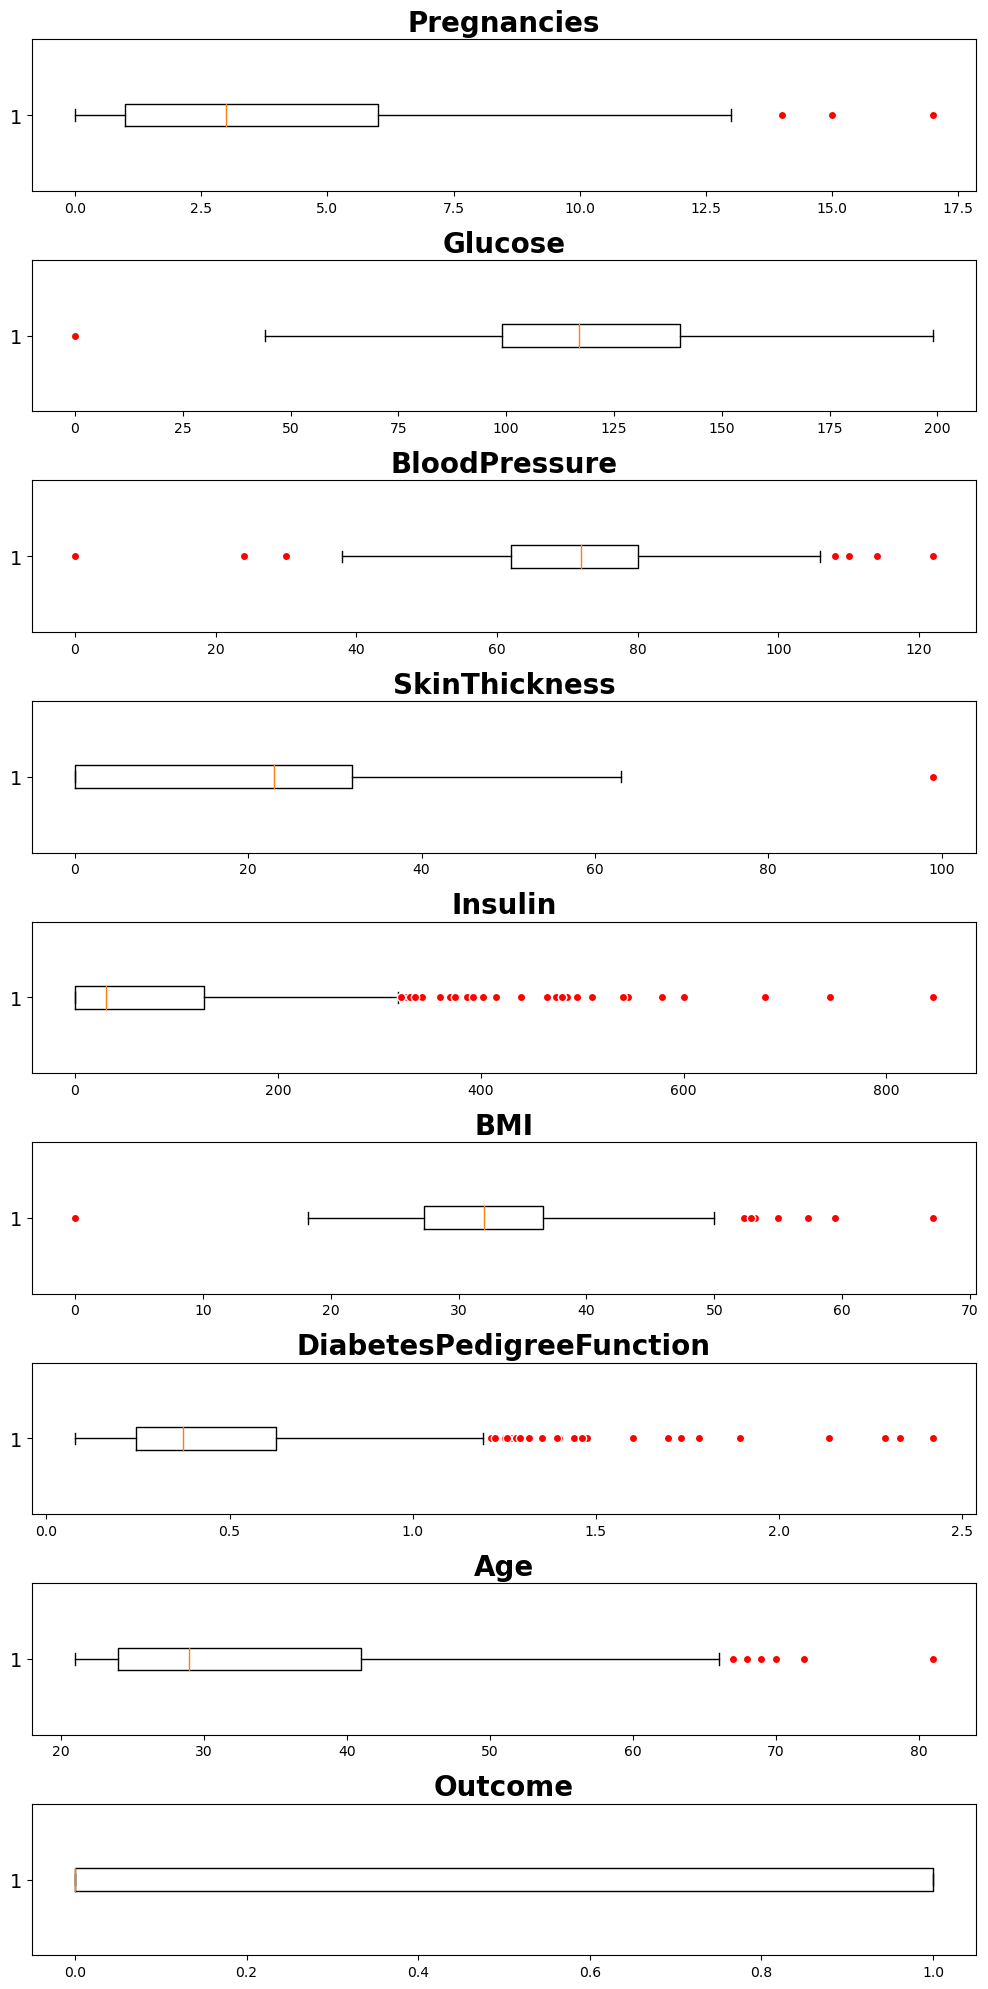

In [149]:
import matplotlib.pyplot as plt

# Detect the outliers in each column (except the Name column) using horizontal boxplots

# Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# Use iloc[:, 1:] to select all columns starting from the second column
fig, axs = plt.subplots(len(df_d.columns) - 1, 1, figsize=(10, 20))

# Start the loop from the second column
for i, ax in enumerate(axs.flat):
    # Use iloc[:, i+1] to select the column excluding the first one
    ax.boxplot(df_d.iloc[:, i + 1], vert=False, flierprops=red_circle)
    # Adjust the index for column names
    ax.set_title(df_d.columns[i + 1], fontsize=20, fontweight='bold')  
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

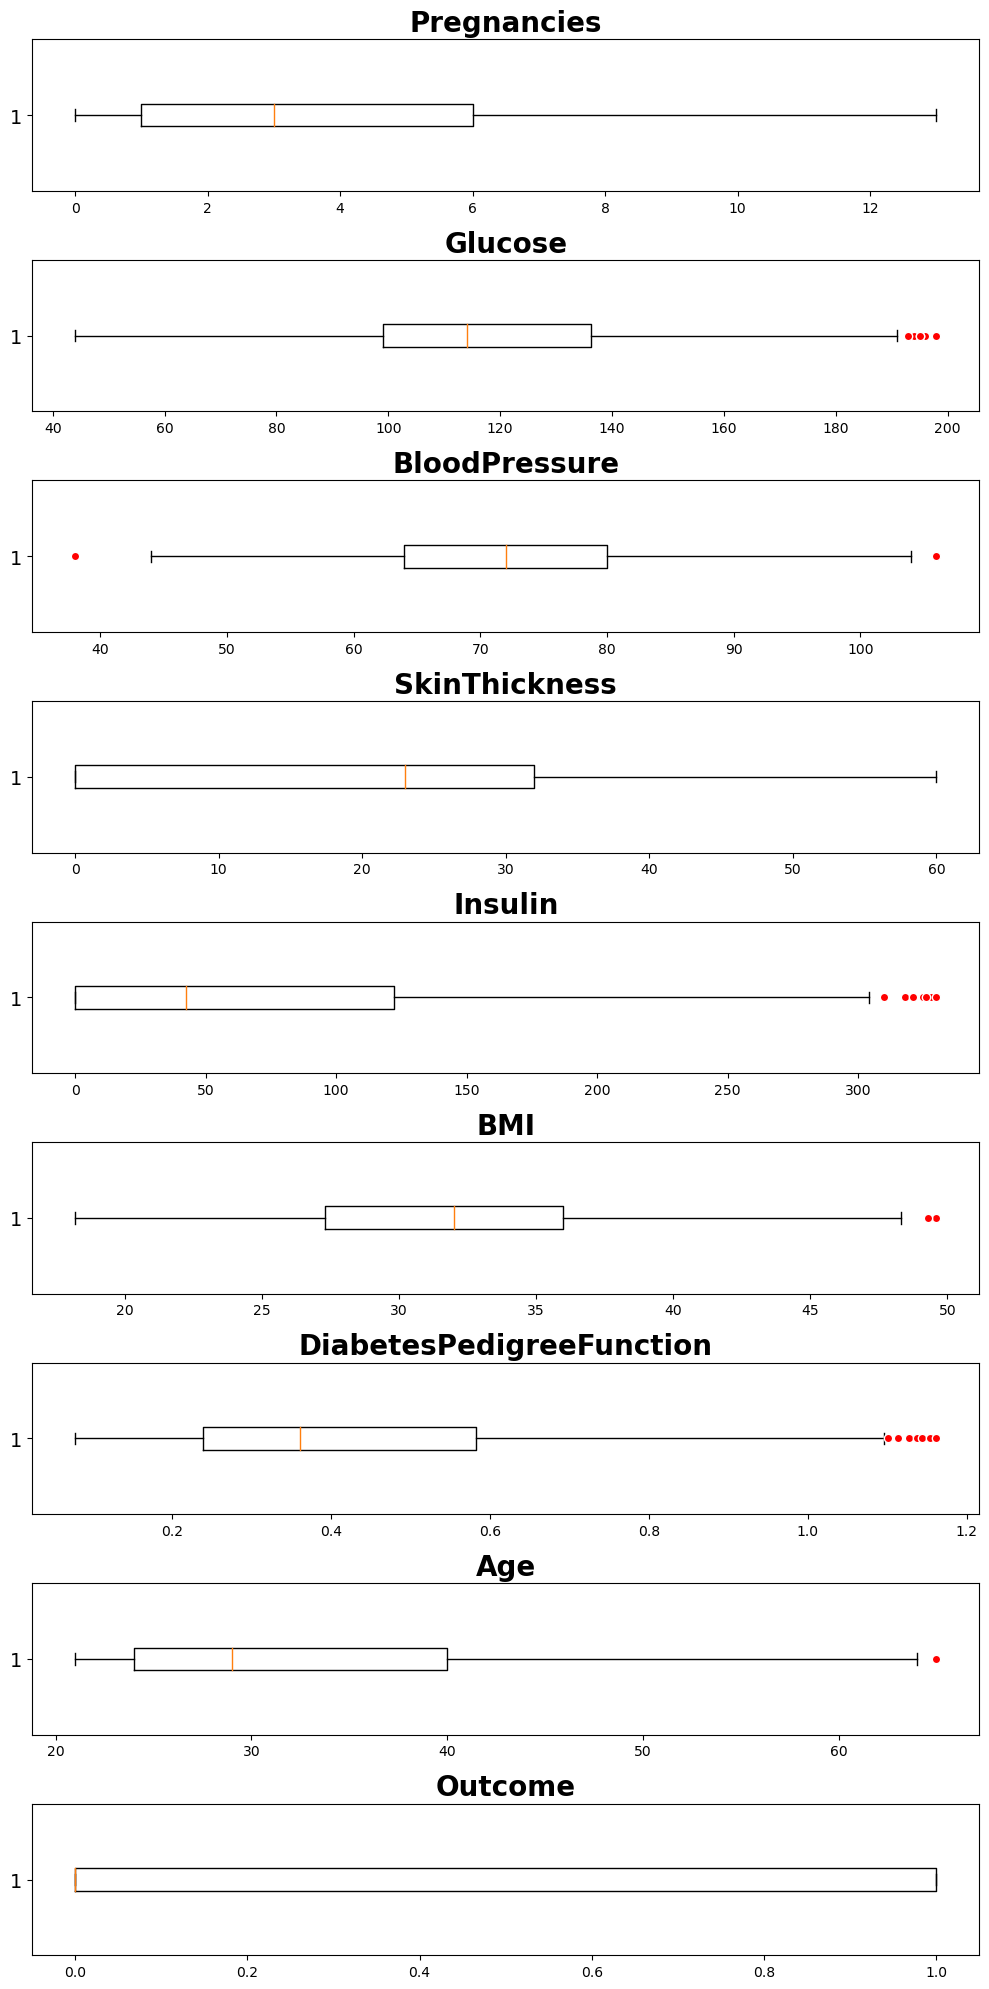

In [150]:
# Drop the outliers by utilizing the Inter Quartile Range (IQR) approach
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the original dataset
df_cleaned = df_d.copy()

# Loop through each numeric column (excluding the first column)
for col in df_d.columns[1:]:
    df_cleaned = drop_outliers_iqr(df_cleaned, col)

# Boxplots for cleaned dataset
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(len(df_cleaned.columns) - 1, 1, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_cleaned.iloc[:, i + 1], vert=False, flierprops=red_circle)
    ax.set_title(df_cleaned.columns[i + 1], fontsize=20, fontweight='bold')  
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


In [151]:
# Compare dimensions of the original and cleaned datasets
original_shape = df_d.shape
cleaned_shape = df_cleaned.shape

print("Original Dataset Dimensions:", original_shape)
print("Cleaned Dataset Dimensions:", cleaned_shape)

Original Dataset Dimensions: (768, 10)
Cleaned Dataset Dimensions: (636, 10)


**Part IV & Part V: Feature Importance Assessment and Application of SBS and Logistic Regression**

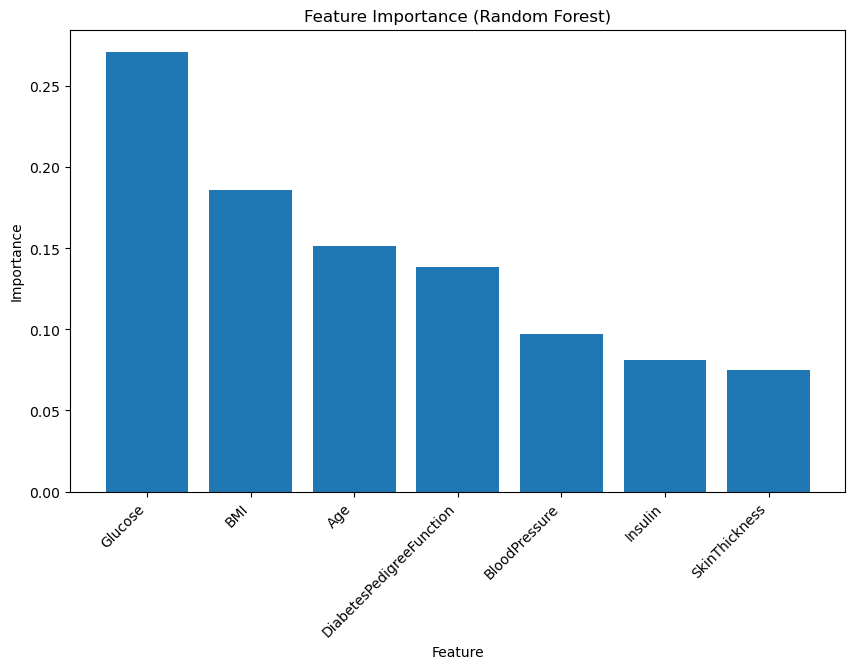

In [152]:
# Utilize the Random Forest method to assess feature importance (excluding the Name column and generate a bar plot that ranks the various features 

from sklearn.ensemble import RandomForestClassifier

X_rf = df_d.iloc[:, 2:9]
y_rf = df_d['Outcome']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_rf, y_rf)

# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df_rf = pd.DataFrame({'Feature': X_rf.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [153]:
# Split the dataset to training data and test set with 30% test size and random state 1

from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=1)

In [154]:
# Implement standard scaling method

from sklearn.preprocessing import StandardScaler

scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_rf)
X_test_scaled_rf = scaler_rf.transform(X_test_rf)

In [155]:
# Train the Logistic Regression model by fitting the training dataset using the LogisticRegressionclass and the fit method from sklearn.svm with penalty='l1' and solver='liblinear'

from sklearn.linear_model import LogisticRegression

logreg_rf = LogisticRegression(penalty='l1', solver='liblinear', random_state=1)
logreg_rf.fit(X_train_scaled_rf, y_train_rf)

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [156]:
# Print the accuracy of the Logistic Regression model on both the training dataset and the testdataset

from sklearn.metrics import accuracy_score

y_train_pred_rf = logreg_rf.predict(X_train_scaled_rf)
y_test_pred_rf = logreg_rf.predict(X_test_scaled_rf)

train_accuracy_rf = accuracy_score(y_train_rf, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)

print(f'Accuracy of the Logistic Regression model on the training dataset: {train_accuracy_rf:.2f}')
print(f'Accuracy of the Logistic Regression model on the test dataset: {test_accuracy_rf:.2f}')


Accuracy of the Logistic Regression model on the training dataset: 0.77
Accuracy of the Logistic Regression model on the test dataset: 0.78


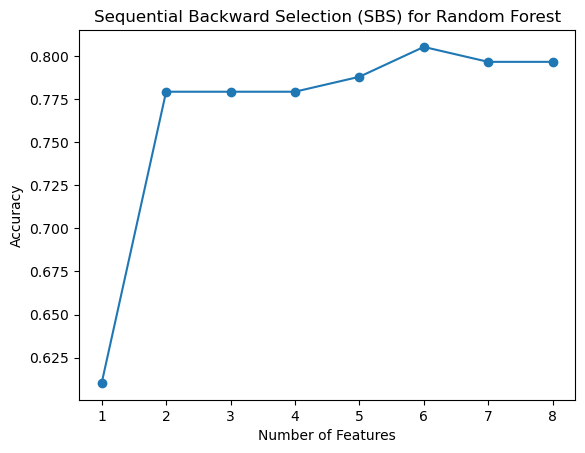

In [157]:
# Implement the Sequential Backward Selection (SBS) algorithm on the training dataset and create a graph depicting Accuracy vs. Number of Features plot

from sklearn.feature_selection import RFE

rf_classifier = RandomForestClassifier(random_state=1)

# Number of features to consider at each step
step = 1

# Feature ranking with Recursive Feature Elimination
rfe = RFE(rf_classifier, n_features_to_select=1, step=step)
rfe.fit(X_train_scaled_rf, y_train_rf)

# Ranking of features (ranking is from low to high)
feature_ranking = np.argsort(rfe.ranking_)

# Plotting Accuracy vs. Number of Features
num_features = range(1, len(feature_ranking) + 2)
accuracy_vs_features = []

for i in num_features:
    selected_features = X_train_scaled_rf[:, feature_ranking[:i]]
    rf_classifier.fit(selected_features, y_train_rf)
    accuracy = rf_classifier.score(X_test_scaled_rf[:, feature_ranking[:i]], y_test_rf)
    accuracy_vs_features.append(accuracy)

# Plot
plt.plot(num_features, accuracy_vs_features, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('Sequential Backward Selection (SBS) for Random Forest')
plt.show()


In [158]:
# Accuracy on the training dataset
selected_features_train = X_train_scaled_rf[:, feature_ranking[:len(feature_ranking)]]
accuracy_train = rf_classifier.score(selected_features_train, y_train_rf)

# Accuracy on the test dataset
selected_features_test = X_test_scaled_rf[:, feature_ranking[:len(feature_ranking)]]
accuracy_test = rf_classifier.score(selected_features_test, y_test_rf)

print(f'Accuracy of the SBS model on the training dataset: {accuracy_train:.2f}')
print(f'Accuracy of the SBS model on the test dataset: {accuracy_test:.2f}')


Accuracy of the SBS model on the training dataset: 1.00
Accuracy of the SBS model on the test dataset: 0.80


**Question: Which algorithm yields a higher accuracy, SBS or Logistic Regression?**

SBS yields higher accuracy on both the training and test dataset.